In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from prophet import Prophet
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
plt.rcParams['figure.figsize'] = [8, 4]

In [3]:
df=pd.read_csv('dados_operacoes.csv', sep=',', encoding='latin-1')
base=df

In [4]:
df.head()

,id,contrato,data_operacao,nascimento,idade,genero,bairro,cidade,estado,cep,...,empregador,operacao,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
0,682e8b505c30bb12052f9457516dc47e7eafc8ed,1760865030954,2019-09-13,1974-06-08,48,F,Conjunto Paulo Vi,Moreira,Rio de Janeiro,XXXXX-685,...,e53d5342e82e0ce6061bc3aaea1a986f24a73613,Prod,27810.69,100,100,20,20,1.46493,531.56,53156.0000
1,45ad9d444a276407df8b6f47c0fcc5b127dadaaa,6023030871505,2022-11-03,1988-07-23,34,F,Minas Caixa,da Mota de Azevedo,AmapÃ¡,XXXXX735,...,f715ffaf2c8294df43df3357c6a37f04b900fb06,Refin,9589.96,40,40,6,6,4.53587,523.82,20952.8000
2,81cec74ea2ca41535fee03daeb410ddbdf12906a,560263027614,2021-06-13,1975-08-17,Null,Null,Vila Mantiqueira,Rocha da Prata,Santa Catarina,XXXXX863,...,da9515ffa45dd12791be0941b91188e51fe1cc04,Prod,42963.20,100,100,10,10,1.44749,815.71,81571.0000
3,4e987d9178e2dcb07c2bf3878736233a676a0a87,1397061435926,2021-08-30,1982-08-17,40,F,Anchieta,da Mata,Null,Null,...,0c1741dc26339e6af3e4b6badcf984d383d1ca44,Port + Refin,2954.14,120,120,6,6,1.82904,60.96,7315.1997
4,595943ecdb32a24ccb6ef374b6d865f3b60d7130,3823566005671,2022-11-16,1985-07-14,37,F,Conjunto Floramar,Moreira de GoiÃ¡s,Mato Grosso,XXXXX384,...,f97b240dc24290c19e717d7a654747aa31722ad3,Prod,31186.17,100,100,10,10,3.28340,1066.11,106611.0000


In [5]:
df.describe().round(2)

,contrato,valor_principal,parcelas,quantidade_parcelas,parcelas_pagas,quantidade_parcelas_pagas,taxa_contrato,valor_parcela,valor_bruto
count,1.489500e+04,14895.00,14895.00,14895.00,14895.00,14895.00,14895.00,14895.00,14895.00
mean,4.986736e+12,23185.88,68.22,68.22,15.74,15.74,2.13,724.27,47446.57
std,2.894235e+12,13500.84,27.13,27.13,17.52,17.52,1.34,515.07,39877.20
min,7.105632e+08,203.55,40.00,40.00,0.00,0.00,0.35,3.05,252.40
25%,2.466882e+12,12484.04,40.00,40.00,6.00,6.00,1.02,336.70,20689.50
50%,4.964680e+12,20256.79,60.00,60.00,9.00,9.00,1.79,601.64,38220.00
75%,7.513420e+12,34651.28,90.00,90.00,18.00,18.00,3.02,1007.66,61545.20
max,9.999785e+12,49995.02,120.00,120.00,108.00,108.00,6.46,3063.99,367678.80


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14895 entries, 0 to 14894
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         14895 non-null  object 
 1   contrato                   14895 non-null  int64  
 2   data_operacao              14895 non-null  object 
 3   nascimento                 14895 non-null  object 
 4   idade                      14895 non-null  object 
 5   genero                     14895 non-null  object 
 6   bairro                     14895 non-null  object 
 7   cidade                     14895 non-null  object 
 8   estado                     14895 non-null  object 
 9   cep                        14895 non-null  object 
 10  telefone                   14895 non-null  object 
 11  cartao                     14895 non-null  object 
 12  email                      14895 non-null  object 
 13  ocupacao                   14895 non-null  obj

In [7]:
colunas=df.columns.unique()
colunas

Index(['id', 'contrato', 'data_operacao', 'nascimento', 'idade', 'genero', 'bairro', 'cidade', 'estado', 'cep', 'telefone', 'cartao', 'email', 'ocupacao', 'empregador', 'operacao', 'valor_principal', 'parcelas', 'quantidade_parcelas', 'parcelas_pagas', 'quantidade_parcelas_pagas', 'taxa_contrato', 'valor_parcela', 'valor_bruto'], dtype='object')

Faça uma análise inicial dos dados: você encontrou algum problema? Como você trataria estes problemas?

In [8]:
df.replace('Null', np.nan, inplace=True)
print(df.isna().sum())

id                              0
contrato                        0
data_operacao                   0
nascimento                      0
idade                        3005
genero                       1487
bairro                       2539
cidade                       2831
estado                       2234
cep                          3754
telefone                     4655
cartao                       5279
email                        4667
ocupacao                     2271
empregador                   3124
operacao                        0
valor_principal                 0
parcelas                        0
quantidade_parcelas             0
parcelas_pagas                  0
quantidade_parcelas_pagas       0
taxa_contrato                   0
valor_parcela                   0
valor_bruto                     0
dtype: int64


Existem alguns dados aqui que pode ser recalculados e preenchidos com a informação correta, como idade baseada na data de nascimento decrescida da data da operação. No entanto, outras variáveis como e-mail, não podem ser preenchidas com as informações disponíveis.

In [9]:
colunas_continuas=['idade','valor_principal', 'parcelas', 'quantidade_parcelas', 'parcelas_pagas', 'quantidade_parcelas_pagas', 'taxa_contrato', 'valor_parcela', 'valor_bruto']

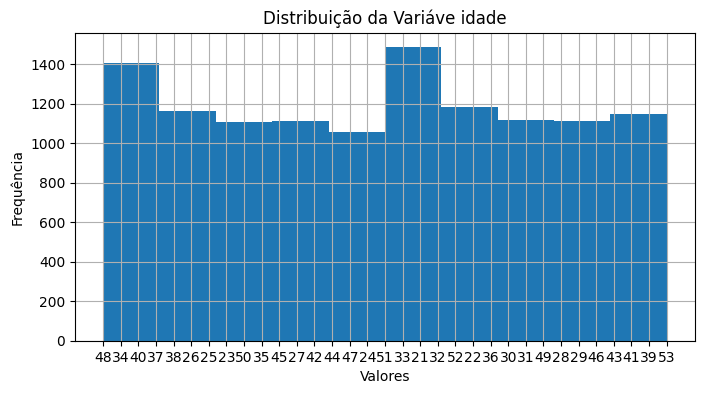

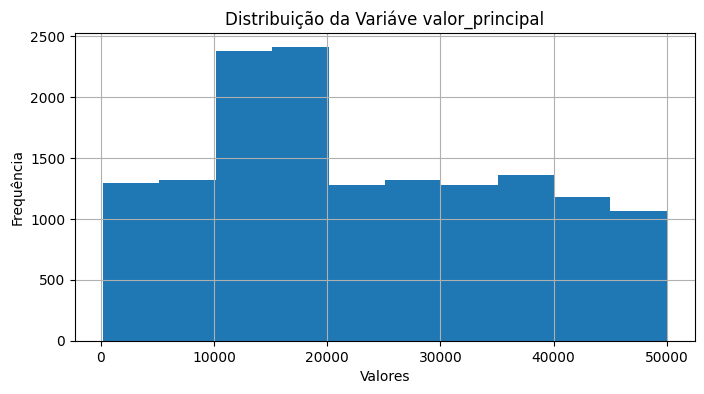

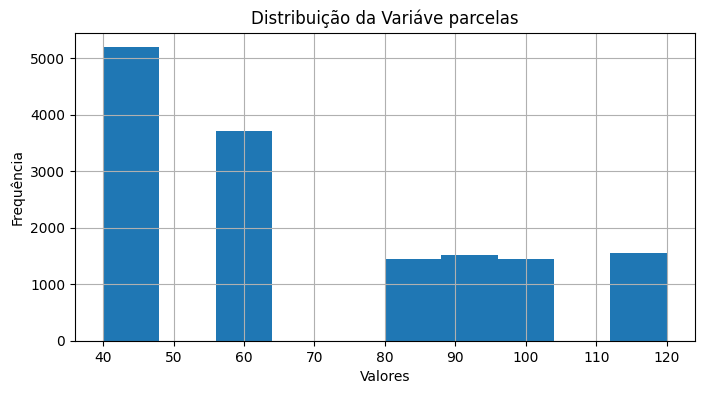

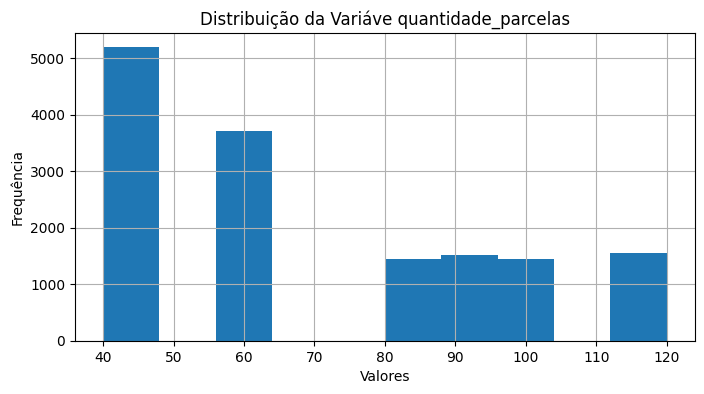

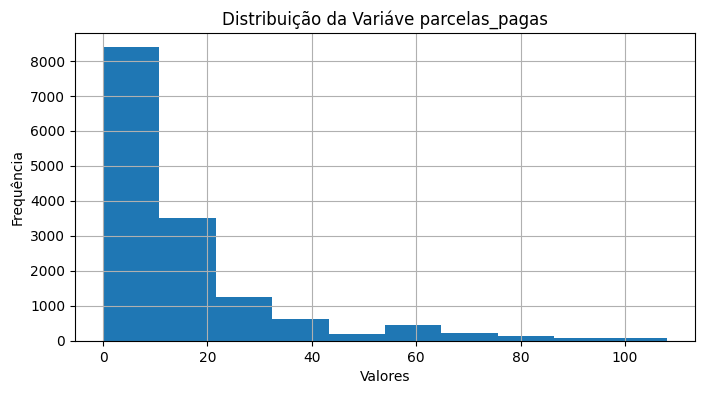

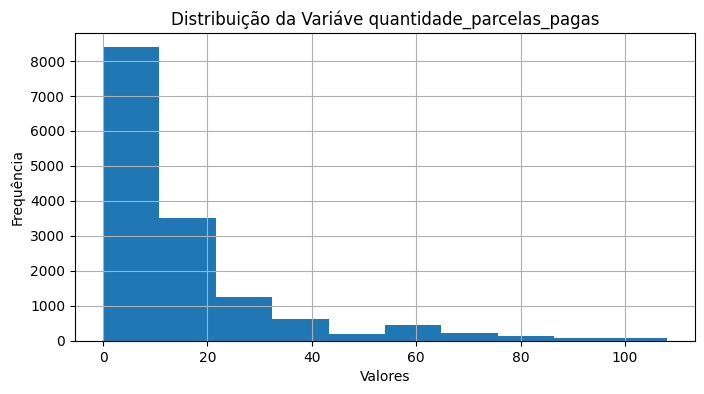

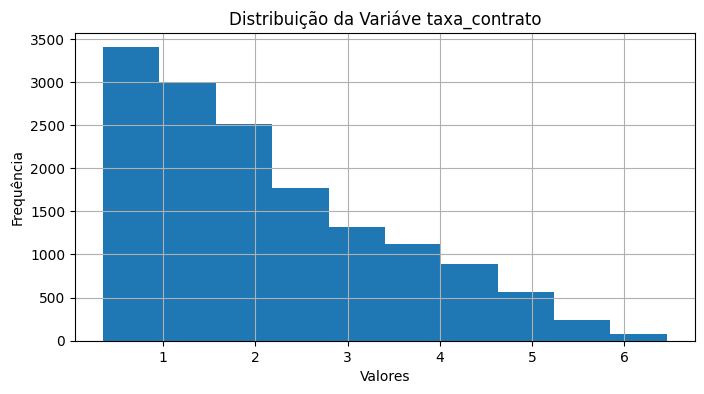

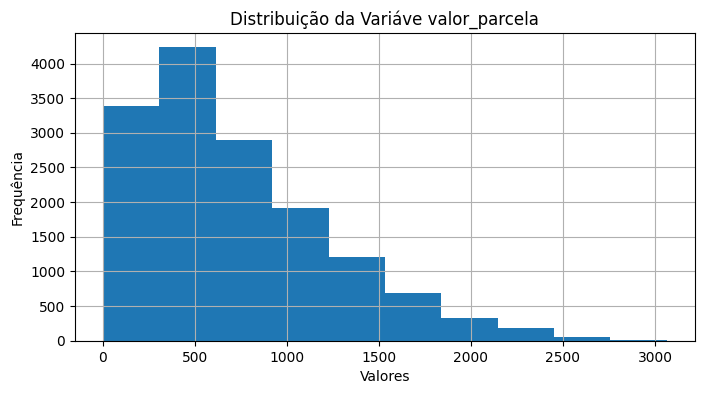

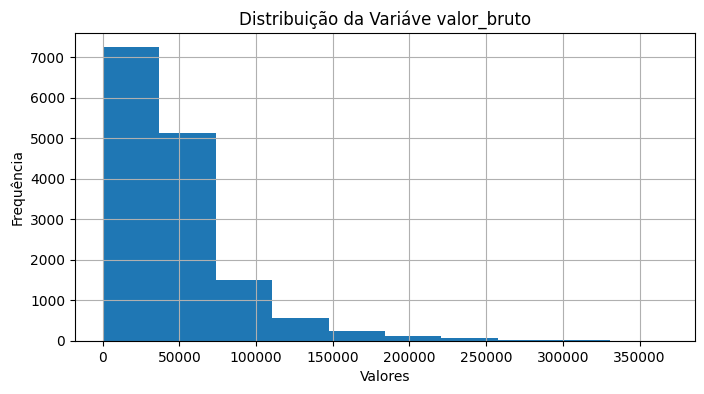

In [10]:
import matplotlib.pyplot as plt
for i in colunas_continuas:
    df[i].hist(bins=10)  # Ajuste o número de bins conforme necessário
    plt.title('Distribuição da Variáve '+ str(i))
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.show()

Tipo de dado não suportado para a coluna idade: object


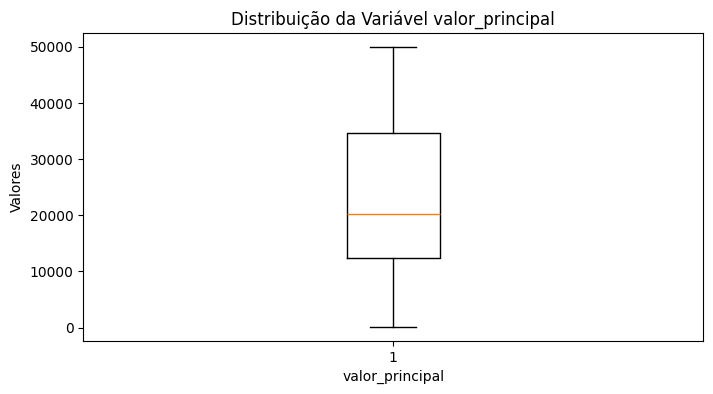

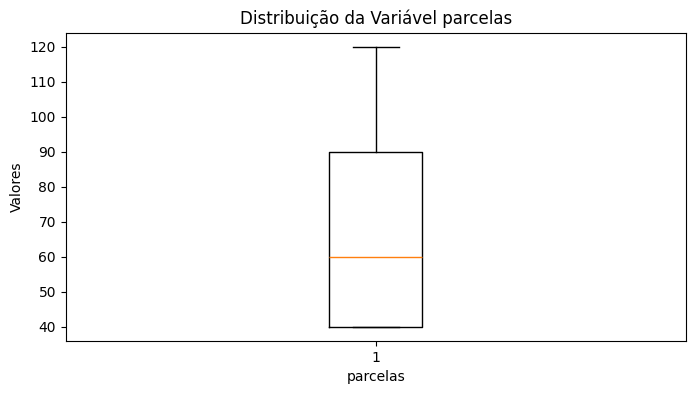

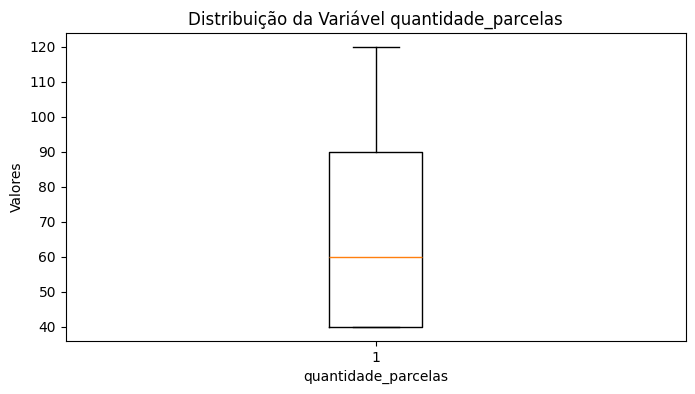

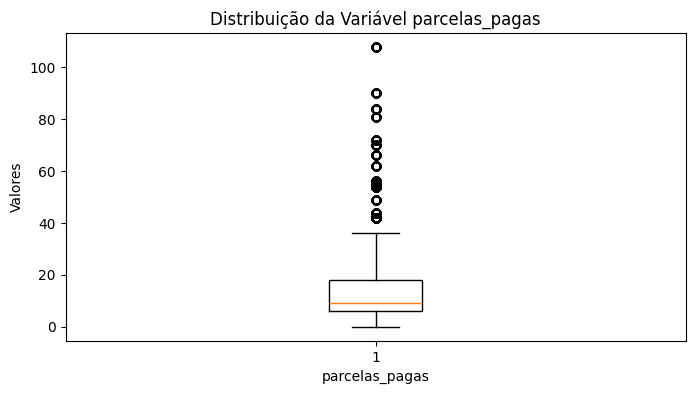

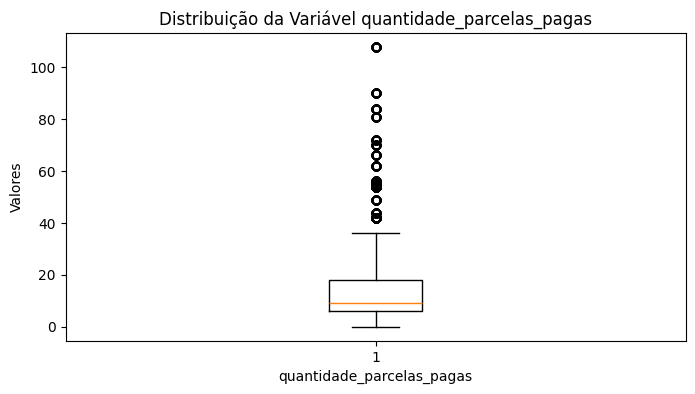

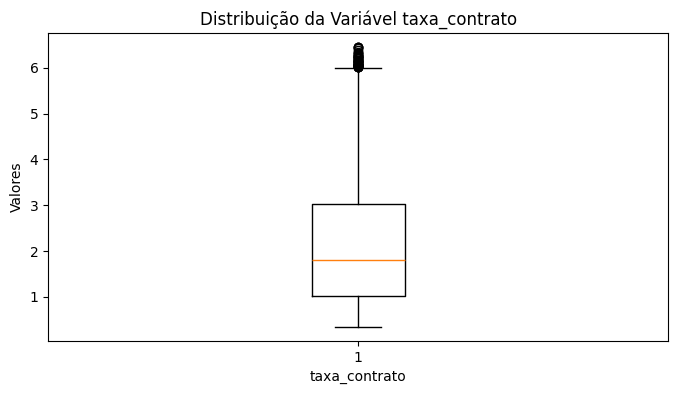

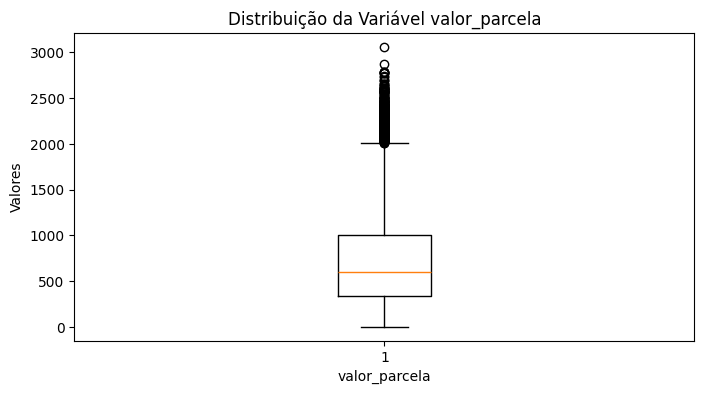

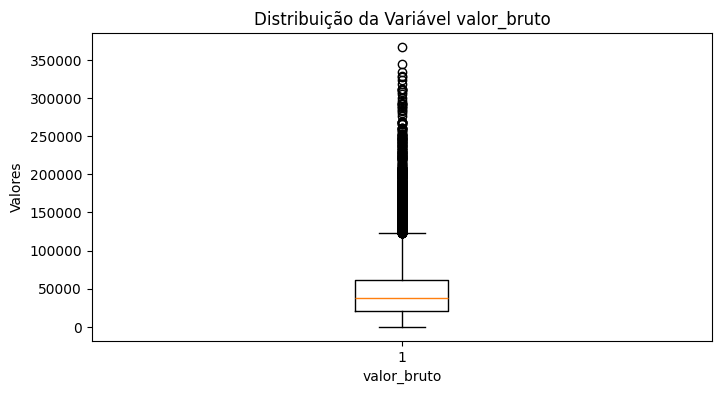

In [11]:
for i in colunas_continuas:
    if i in df.columns:  
        if df[i].dtype.kind in 'biufc': 
            plt.boxplot(df[i].dropna())
            plt.title(f'Distribuição da Variável {i}') 
            plt.xlabel(i) 
            plt.ylabel('Valores') 
            plt.show()
        else:
            print(f"Tipo de dado não suportado para a coluna {i}: {df[i].dtype}")
    else:
        print(f"Coluna {i} não encontrada no DataFrame.")

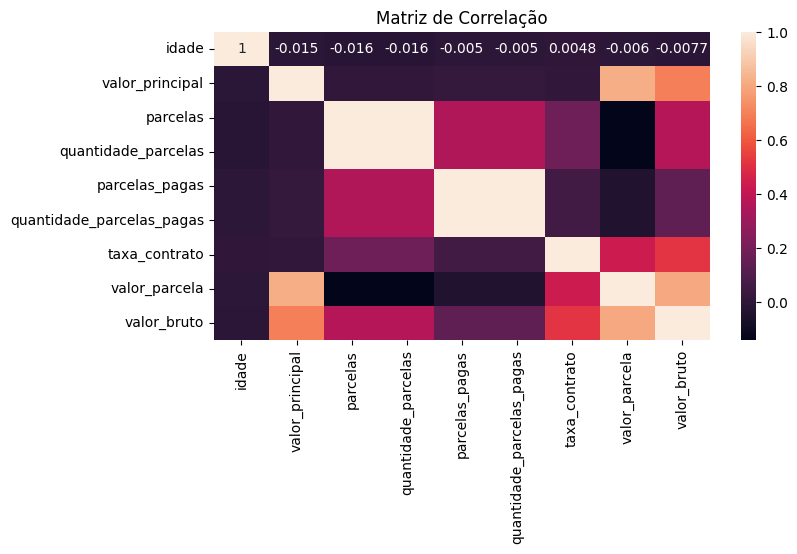

In [12]:
correlation_matrix = df[colunas_continuas].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlação')
plt.show()

In [13]:
df_prophet = df.groupby('data_operacao')['valor_principal'].sum().reset_index()
df_prophet.columns = ['ds', 'y']

In [14]:
df_prophet

,ds,y
0,2019-01-01,107663.77
1,2019-01-02,226089.48
2,2019-01-03,210935.84
3,2019-01-04,85949.57
4,2019-01-05,95787.24
...,...,...
1452,2022-12-26,160835.74
1453,2022-12-27,331690.99
1454,2022-12-28,299305.49
1455,2022-12-29,325785.43


In [15]:
# Criar uma instância do modelo Prophet
model = Prophet(yearly_seasonality=True, daily_seasonality=False)

In [16]:

# Ajustar o modelo aos dados
model.fit(df_prophet)

17:59:26 - cmdstanpy - INFO - Chain [1] start processing
17:59:27 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# Criar dataframe que se estende no futuro por 2 anos
future_dates = model.make_future_dataframe(periods=2*365, freq='D')

# Usar o modelo para fazer previsões
forecast = model.predict(future_dates)

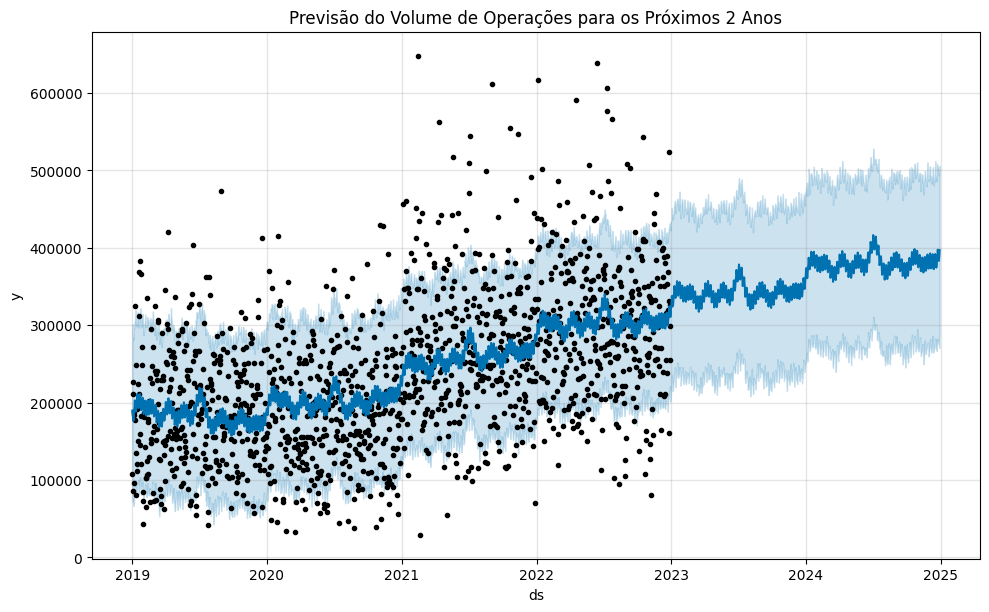

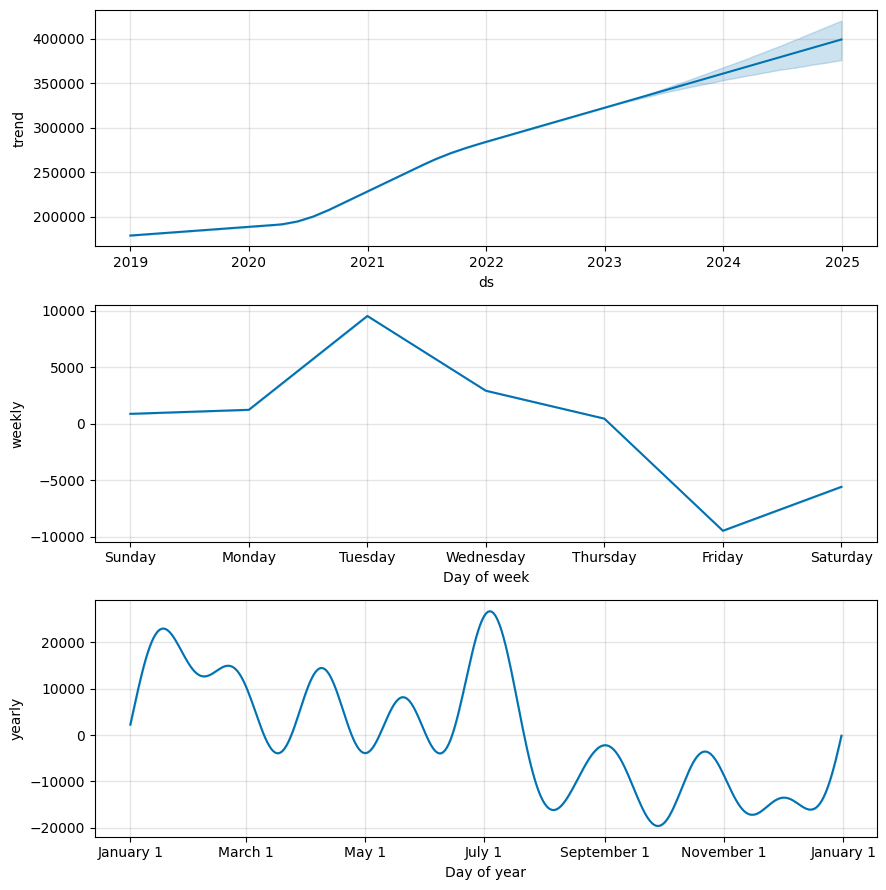

In [18]:
import matplotlib.pyplot as plt

# Plotar os dados históricos e as previsões
fig1 = model.plot(forecast)
plt.title('Previsão do Volume de Operações para os Próximos 2 Anos')
plt.show()

# Plotar componentes das previsões (tendência, sazonalidade anual, etc.)
fig2 = model.plot_components(forecast)
plt.show()